In [1]:
## 1D heat equation using scipy fft

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams.update({'font.size':18})


c = 1
L = 10 #Define the length of the rod
N = 100 # No of points between 0 to L
dx = L/N
x = np.arange(0,L,dx) #Define the x range

# omega_n = n*pi/L  - dicrete frequencies
omega = np.pi*np.fft.fftfreq(N,d =dx)  

#Define the time interval to get the time evolution of the system
dt = 0.1
t = np.arange(0,200,dt)

Text(0, 0.5, 'Initial Temperature ')

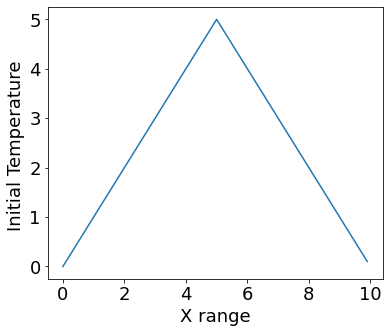

In [2]:
## Initialize the function U(Temperature) and plot it
u_initial = np.zeros_like(x)
u_initial[0:int(N/2)] = x[0:int(N/2)]
u_initial[int(N/2) : N] = L - x[int(N/2):int(N)]

#plot
plt.plot(x,u_initial)
plt.xlabel("X range")
plt.ylabel("Initial Temperature ")

### Heat Equation
#### If u is the function representing the temperature, then
$$ \frac{du}{dt} = c^{2}\frac{d^{2}u}{dx^{2}} $$
#### Taking fourier transform we get
$$ FT(u) = u_{ft}$$
$$ \frac{du_{ft}}{dt} = -w^{2}c^{2}u_{ft}$$
#### Solve the ODE and take the inverse to get the solution
$$ u_{soln} = IFT(u_{Ft})$$


In [3]:
## Get the discrete sine transform (DST) of the initial temperature -> Use DST to apply dirichlet boundary conditions
from scipy import fft
u_ft = fft.dst(u_initial)

In [4]:
## Get the RHS of the differential eqaution -> first argument for the odeint function
## We need not concatenate the real and imaginary parts separately as the output from dst is real 
def rhs_diff_eqn(u_ft,t,omega,c):
    d_uft = -c**2 * (np.power(omega,2))*u_ft
    return d_uft

### Solve the individual ODEs 
usoln_ft = odeint(rhs_diff_eqn, u_ft,t,args= (omega,c))

In [5]:
### Get the inverse sine transform for each t
u_sol = usoln_ft
for k in range(len(t)):
    u_sol[k,:] = fft.idst(u_sol[k,:])
u_soln = u_sol.real

Text(0, 0.5, 'Final temperature for different time t')

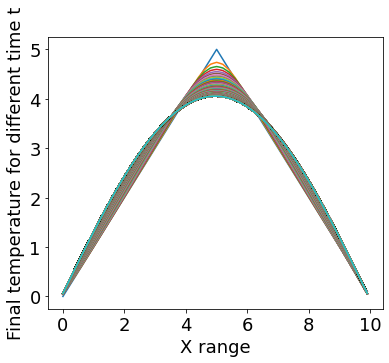

In [6]:
### Plot the solution for each time 't'
for i in range(len(t)):
    plt.plot(x,u_soln[i])
plt.xlabel('X range')
plt.ylabel('Final temperature for different time t')

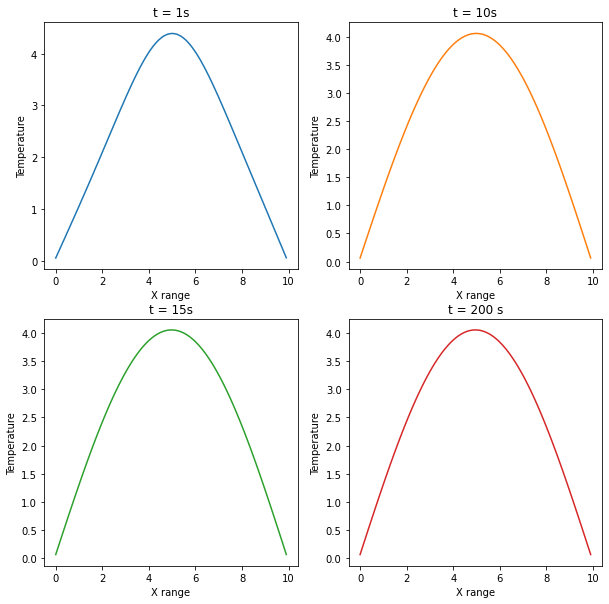

In [12]:
plt.rcParams.update({'font.size':10})
plt.rcParams['figure.figsize'] = [10,10]
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x,u_soln[10])
axs[0, 0].set_title('t = 1s')
axs[0, 1].plot(x,u_soln[100], 'tab:orange')
axs[0, 1].set_title('t = 10s')
axs[1, 0].plot(x,u_soln[150], 'tab:green')
axs[1, 0].set_title('t = 15s')
axs[1, 1].plot(x,u_soln[1999], 'tab:red')
axs[1, 1].set_title('t = 200 s')

for ax in axs.flat:
    ax.set(xlabel='X range', ylabel='Temperature')

Text(0, 0.5, 'Temperature')

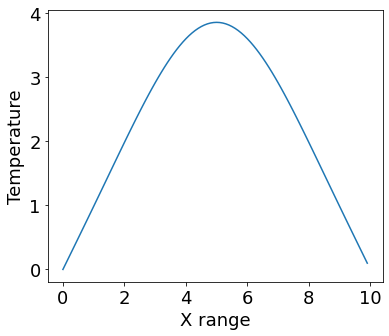

In [8]:
#Plotting actual solution for t = 1s
exp = (4*L/np.pi**2)*(np.sin(np.pi*x/L)*np.exp(-1*((c*np.pi/L)**2)) -(1/9)*np.sin(3*np.pi*x/L)*np.exp(-1*((3*c*np.pi/L)**2)))

#Plotting
plt.plot(x,exp)
plt.xlabel('X range')
plt.ylabel('Temperature')